In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import joblib

CLEAN_FILE_PATH = "../data/processed/cleaned_data.csv"
MODEL_DIR = "../models"


Loaded LogisticRegression from ../models/baseline_model.joblib
Loaded RandomForest from ../models/randomforest.joblib
Loaded GradientBoosting from ../models/gradientboosting.joblib
Loaded XGBoost from ../models/xgboost.joblib


,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.210654,0.524644,0.210654,0.246489
1,RandomForest,0.610169,0.607860,0.610169,0.608214
2,GradientBoosting,0.670702,0.647055,0.670702,0.629489
3,XGBoost,0.651332,0.667533,0.651332,0.623850


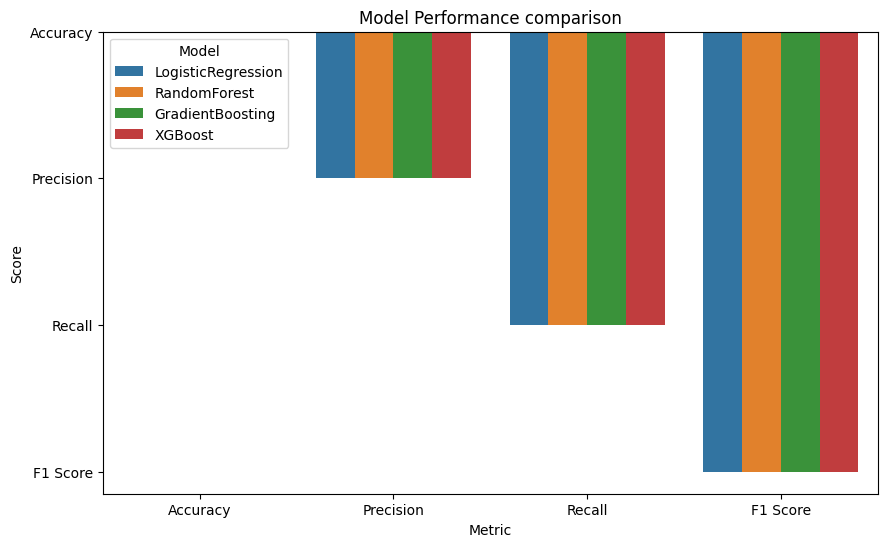

In [13]:
df = pd.read_csv(CLEAN_FILE_PATH)


if "x_norm" not in df.columns or "y_norm" not in df.columns:
    df["x_norm"] = df["end_x"] / 50.0
    df["y_norm"] = df["end_y"] / 25.0

if "team_encoded" not in df.columns and "team" in df.columns:
    df["team_encoded"] = df["team"].astype("category").cat.codes

if "event_encoded" not in df.columns and "event" in df.columns:
    df["event_encoded"] = df["event"].astype("category").cat.codes

features = ["x_norm", "y_norm", "team_encoded"]
target = "event_encoded"
x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

models = {}
for name, path in {
    "LogisticRegression": f"{MODEL_DIR}/baseline_model.joblib",
    "RandomForest": f"{MODEL_DIR}/randomforest.joblib",
    "GradientBoosting": f"{MODEL_DIR}/gradientboosting.joblib",
    "XGBoost": f"{MODEL_DIR}/xgboost.joblib"

}.items():
    if os.path.exists(path):
        models[name] = joblib.load(path)
        print(f"Loaded {name} from {path}")
    else:
        print(f"Model not found : {path}")


metrics  = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    metrics.append(
        {"Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred,average="weighted"),
        "Recall": recall_score(y_test, y_pred,average="weighted"),
        "F1 Score": f1_score(y_test, y_pred,average="weighted")}
     )

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df.melt(id_vars="Model"), x="variable", y="variable", hue="Model" )
plt.title("Model Performance comparison")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.legend(title="Model")
plt.show()



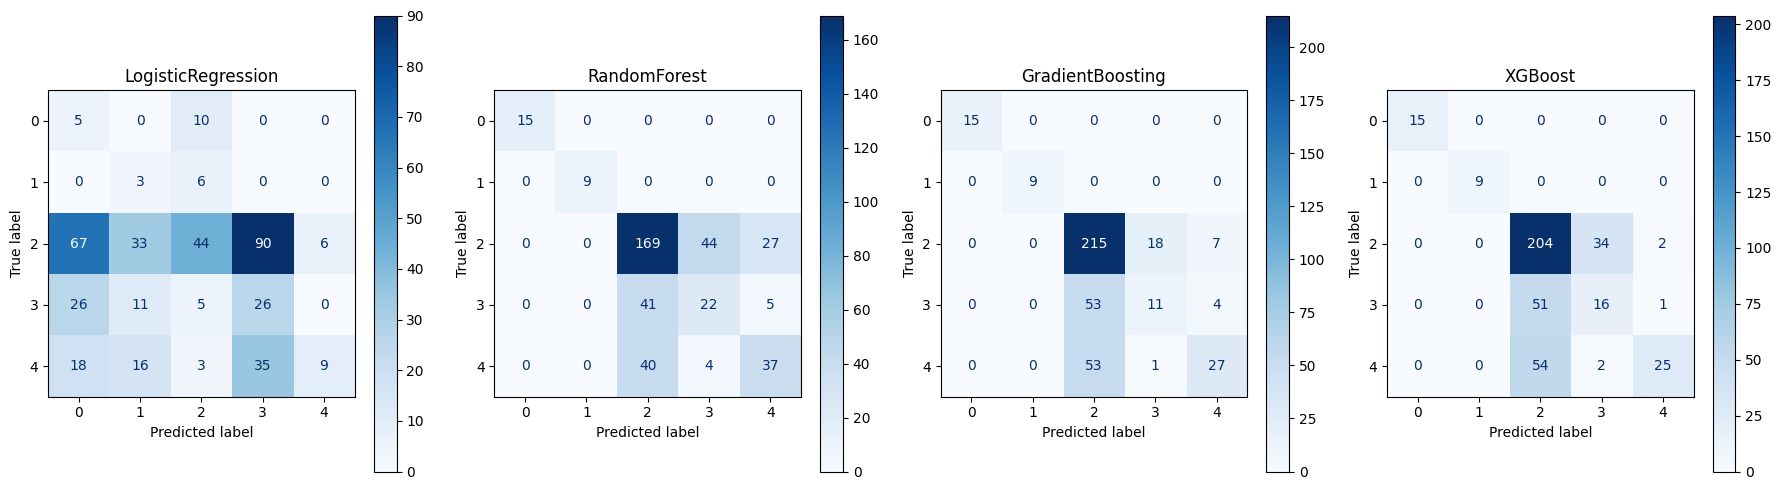

In [14]:
fig, axes = plt.subplots(1,len(models), figsize=(18,5))
for ax ,(name, model) in zip(axes, models.items()):
    disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, ax=ax, cmap='Blues', colorbar='False')
    ax.set_title(name)

plt.tight_layout()
plt.show()